In [2]:
# LIBRARIES

import numpy as np
print('numpy: '+np.version.full_version)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.animation as animation
import matplotlib
print('matplotlib: '+matplotlib.__version__)
from matplotlib import cm
from matplotlib.ticker import MaxNLocator

numpy: 1.21.5
matplotlib: 3.5.1


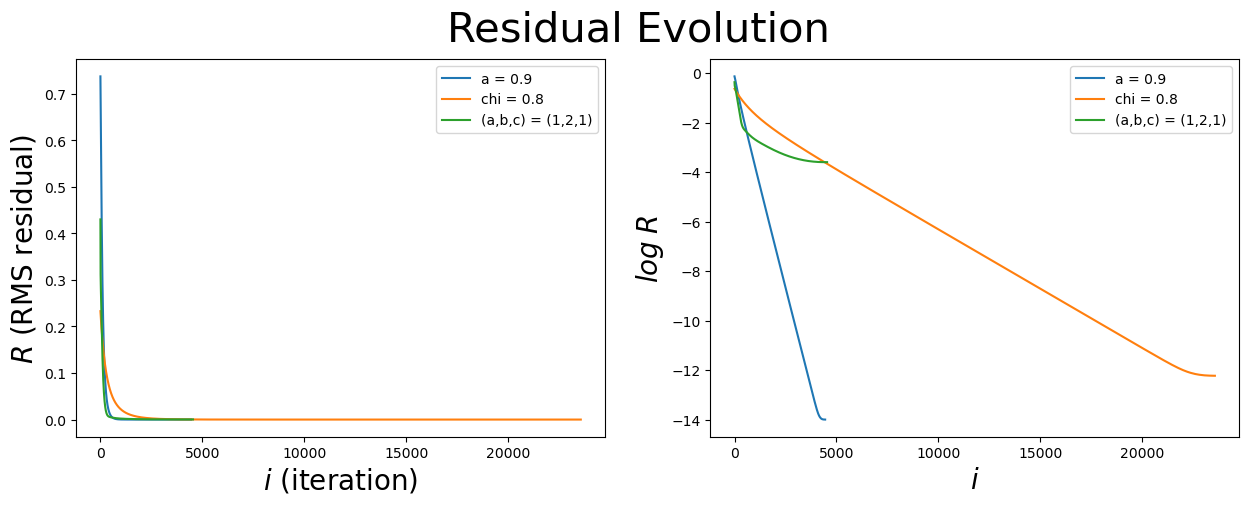

In [19]:
# RESIDUAL EVOLUTION

fig, (ax1, ax2) = plt.subplots(1,2)

entries = [
	[np.genfromtxt('residuals_0.9.csv', delimiter=','), 'a = 0.9'],
	[np.genfromtxt('residuals_0.8.csv', delimiter=','), 'chi = 0.8'],
	[np.genfromtxt('residuals_121.0.csv', delimiter=','), '(a,b,c) = (1,2,1)'],
]


for entry in entries:
	i_values = entry[0][:,0]
	residuals = entry[0][:,1]
	# log_i_values = []
	log_residuals = []

	label = entry[1]

	# for i in i_values:
	# 	log_i_values.append(np.log(i) / np.log(10))

	for residual in residuals:
		log_residuals.append(np.log(residual) / np.log(10))

	ax1.plot(i_values, residuals, label = label)
	ax1.set(xlabel='$i$ (iteration)', ylabel='$R$ (RMS residual)')
	

	ax2.plot(i_values, log_residuals, label = label)
	ax2.set(xlabel='$i$', ylabel='$log \; R$')
	# ax2.plot(log_i_values, log_residuals)
	# ax2.set(xlabel='$\log \; i$', ylabel='$\log \; R$')

ax1.xaxis.label.set_fontsize(20)
ax1.yaxis.label.set_fontsize(20)
ax2.xaxis.label.set_fontsize(20)
ax2.yaxis.label.set_fontsize(20)

fig.suptitle('Residual Evolution', fontsize=30)
fig.set_size_inches(15, 5, forward=True)
fig.set_dpi(100)

ax1.legend()
ax2.legend()
plt.show()

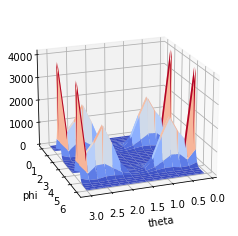

In [9]:
# RESIDUAL DISTRIBUTION ANIMATION

entries = np.genfromtxt('residual_distribution.csv', delimiter=',')

x = entries[0]
y = entries[1]

unique_x = list(set(x))
unique_y = list(set(y))
unique_x.sort()
unique_y.sort()

z = np.zeros((len(unique_x), len(unique_y), len(entries) - 2))

for row in range(2, len(entries)):
	for col in range(len(entries[row])):
		x_index = unique_x.index(x[col])
		y_index = unique_y.index(y[col])
		z[x_index][y_index][row-2] = entries[row][col]

maxFrame = z.shape[2]
X, Y = np.meshgrid(unique_x, unique_y, indexing='ij')

def update_plot(frame_number, z, plot):
    plot[0].remove()
    plot[0] = ax.plot_surface(X, Y, z[:,:,frame_number%maxFrame], cmap=cm.coolwarm)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

plot = [ax.plot_surface(X, Y, z[:,:,0], color='0.75', rstride=1, cstride=1, cmap=cm.coolwarm)]

ax.set_xlabel("theta")
ax.set_ylabel("phi")
ax.view_init(20, 70) # elev, azim
# fig.colorbar(plot[0], shrink=0.5, aspect=5)

fps = 10 # frame per sec
frn = 50 # frame number of the animation
ani = animation.FuncAnimation(fig, update_plot, frn, fargs=(z, plot), interval=100/fps)

fn = 'residual_distribution_animation' # filename
dpi = 200 # dots per inch
ani.save(fn+'.gif',writer='imagemagick',fps=fps, dpi=dpi)

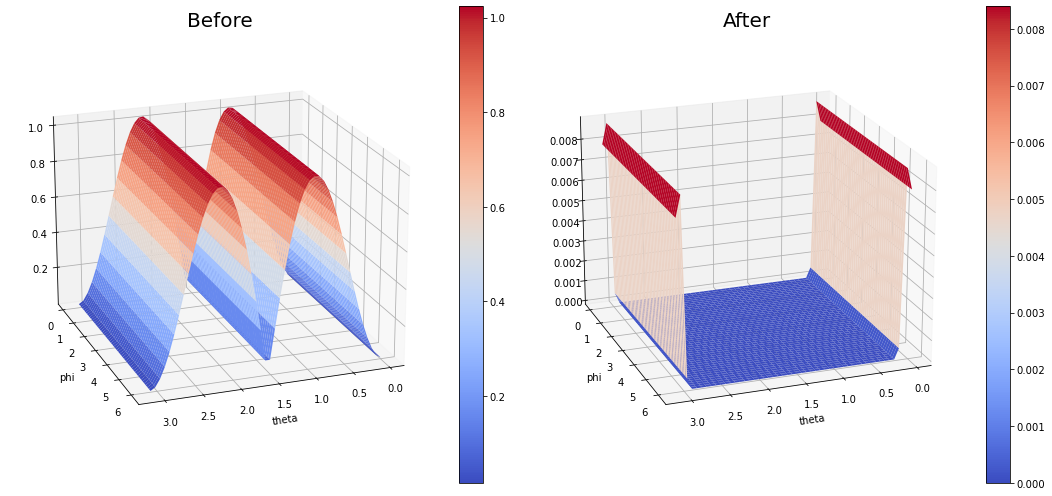

In [6]:
# RESIDUAL DISTRIBUTION COMPARISON

entries = np.genfromtxt('residual_distribution.csv', delimiter=',')

x = entries[0]
y = entries[1]

unique_x = list(set(x))
unique_y = list(set(y))
unique_x.sort()
unique_y.sort()

z = np.zeros((len(unique_x), len(unique_y), len(entries) - 2))

for row in range(2, len(entries)):
	for col in range(len(entries[row])):
		x_index = unique_x.index(x[col])
		y_index = unique_y.index(y[col])
		z[x_index][y_index][row-2] = entries[row][col]

maxFrame = z.shape[2]
X, Y = np.meshgrid(unique_x, unique_y, indexing='ij')

fig = plt.figure(figsize=(15, 7))
# fig = plt.figure()
ax1 = fig.add_subplot(121, projection='3d')
surf1 = ax1.plot_surface(X, Y, z[:,:,0], color='0.75', rstride=1, cstride=1, cmap=cm.coolwarm)
fig.colorbar(surf1)
plt.title('Before', fontsize=20)

ax2 = fig.add_subplot(122, projection='3d')
surf2 = ax2.plot_surface(X, Y, z[:,:,-1], color='0.75', rstride=1, cstride=1, cmap=cm.coolwarm)
fig.colorbar(surf2)
plt.title('After', fontsize=20)

ax1.set_xlabel("theta")
ax2.set_xlabel("theta")
ax1.set_ylabel("phi")
ax2.set_ylabel("phi")
ax1.view_init(20, 70) # elev, azim
ax2.view_init(20, 70) # elev, azim
plt.tight_layout()

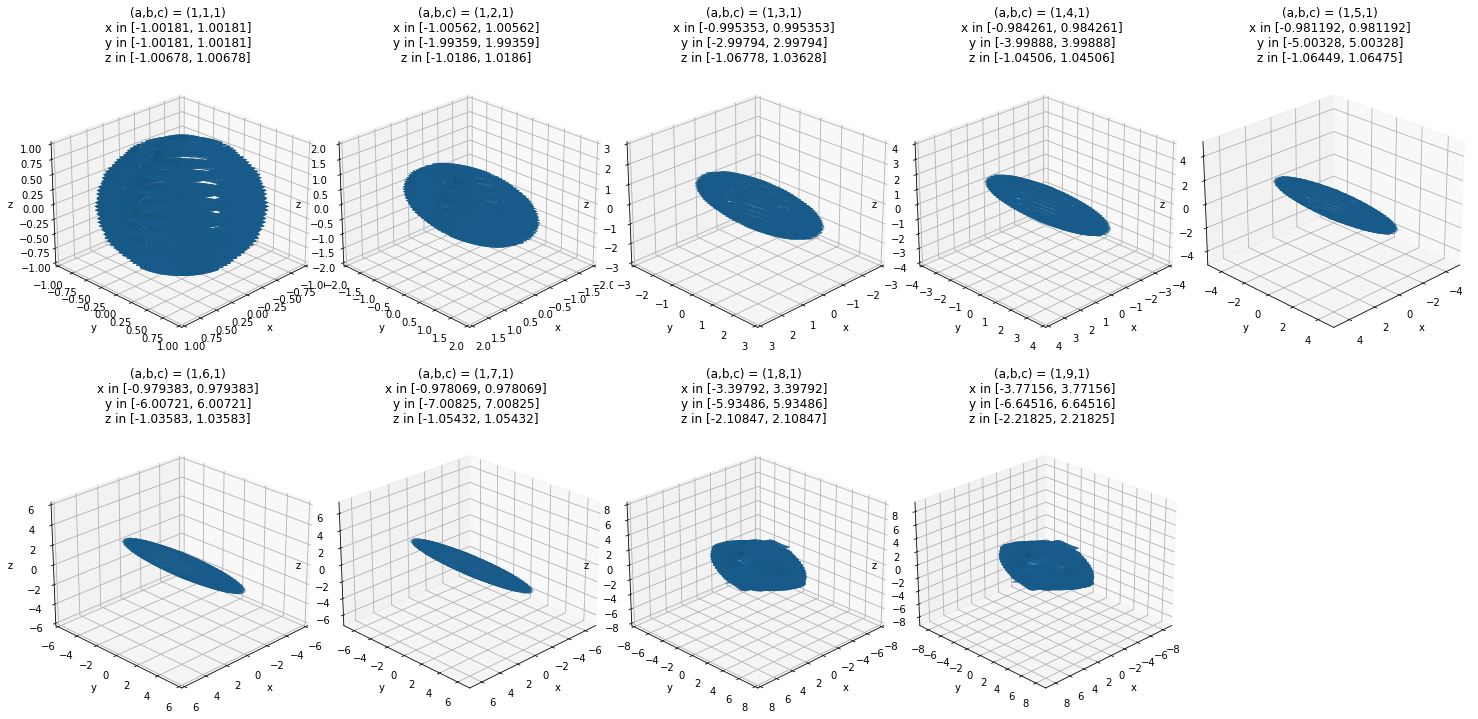

In [4]:
values = [1, 2, 3, 4, 5, 6, 7, 8, 9]

N_theta = 15
N_phi = 60

fig = plt.figure(layout="constrained")

index = 1
for value in values:
	embedding = np.genfromtxt(f'embedding_1{value}1.0.csv', delimiter=',')

	x = embedding[:,0]
	y = embedding[:,1]
	z = embedding[:,2]

	X = np.reshape(x, (N_phi, N_theta))
	Y = np.reshape(y, (N_phi, N_theta))
	Z = np.reshape(z, (N_phi, N_theta))

	ax = fig.add_subplot(2, 5, index, projection='3d')
	ax.plot_surface(X, Y, Z)

	plt.title(f'(a,b,c) = (1,{value},1)\nx in [{min(x)}, {max(x)}]\ny in [{min(y)}, {max(y)}]\nz in [{min(z)}, {max(z)}]')
	ax.set_xlabel("x")
	ax.set_ylabel("y")
	ax.set_zlabel("z")
	ax.set_xlim(-value, value)
	ax.set_ylim(-value, value)
	ax.set_zlim(-value, value)
	ax.view_init(25, 45) # elev, azim

	index += 1

fig.set_size_inches(20, 10, forward=True)

plt.show()

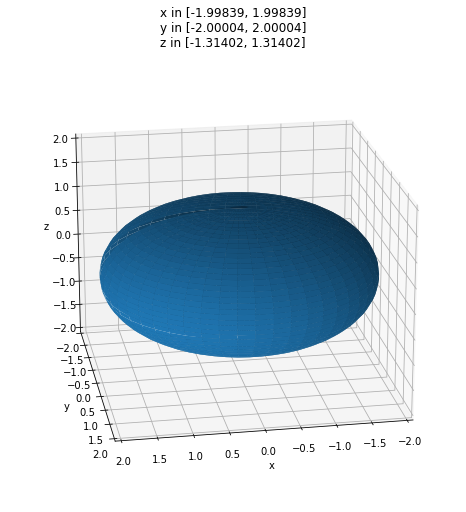

In [16]:
N_theta = 50
N_phi = N_theta

fig = plt.figure(layout="constrained")

embedding = np.genfromtxt('embedding_0.8.csv', delimiter=',')
# print("chi", chi)
# print("x: ", min(x), max(x))
# print("y: ", min(y), max(y))
# print("z: ", min(z), max(z))

x = embedding[:,0]
y = embedding[:,1]
z = embedding[:,2]

X = np.reshape(x, (N_phi, N_theta))
Y = np.reshape(y, (N_phi, N_theta))
Z = np.reshape(z, (N_phi, N_theta))

ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z)

plt.title(f'x in [{min(x)}, {max(x)}]\ny in [{min(y)}, {max(y)}]\nz in [{min(z)}, {max(z)}]')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

side = 2
ax.set_xlim(-side, side)
ax.set_ylim(-side, side)
ax.set_zlim(-side, side)

ax.view_init(20, 80) # elev, azim
# ax.view_init(5, 45) # elev, azim
fig.set_size_inches(20, 7, forward=True)

plt.show()